In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuhs4554","key":"23299dd4a591fc73b14142d060032e71"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3381         65  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1150         30  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10900        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [8]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 98% 175M/178M [00:07<00:00, 29.9MB/s]
100% 178M/178M [00:07<00:00, 23.5MB/s]


In [9]:
!unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [12]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
df['isFraud'].nunique()

2

In [14]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
one_hot = pd.get_dummies(df['type'])
# Drop column B as it is now encoded
df = df.drop('type',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [17]:
df['nameOrig']=df['nameOrig'].str[:1]
df['nameDest']=df['nameDest'].str[:1]
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C,170136.00,160296.36,M,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C,21249.00,19384.72,M,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C,181.00,0.00,C,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C,181.00,0.00,C,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C,41554.00,29885.86,M,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C,339682.13,0.00,C,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C,6311409.28,0.00,C,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C,6311409.28,0.00,C,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C,850002.52,0.00,C,0.00,0.00,1,0,False,False,False,False,True


In [18]:
df=df.drop('nameOrig',axis=1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C,0.00,0.00,1,0,False,False,False,False,True


In [19]:
one_hot = pd.get_dummies(df['nameDest'])
# Drop column B as it is now encoded
df = df.drop('nameDest',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


In [20]:
df=df.drop('M',axis=1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True


In [21]:
df.max()

step                       743
amount             92445516.64
oldbalanceOrg      59585040.37
newbalanceOrig     49585040.37
oldbalanceDest    356015889.35
newbalanceDest    356179278.92
isFraud                      1
isFlaggedFraud               1
CASH_IN                   True
CASH_OUT                  True
DEBIT                     True
PAYMENT                   True
TRANSFER                  True
C                         True
dtype: object

In [22]:
df.min()

step                  1
amount              0.0
oldbalanceOrg       0.0
newbalanceOrig      0.0
oldbalanceDest      0.0
newbalanceDest      0.0
isFraud               0
isFlaggedFraud        0
CASH_IN           False
CASH_OUT          False
DEBIT             False
PAYMENT           False
TRANSFER          False
C                 False
dtype: object

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Specify columns for min-max scaling
columns_to_scale = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the specified columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [24]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [25]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [26]:
df1=df[df['isFraud']==1]
df1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [27]:
df2=df[df['isFraud']==0].sample(n=8213)
df2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
1631155,0.210243,0.001243,0.000173,0.000000,0.001922,0.002243,0,0,False,True,False,False,False,True
6248439,0.801887,0.000156,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
2995723,0.311321,0.000391,0.000019,0.000752,0.000000,0.000000,0,0,True,False,False,False,False,True
5823414,0.540431,0.003421,0.000000,0.000000,0.003175,0.004062,0,0,False,True,False,False,False,True
5178753,0.482480,0.000151,0.004899,0.005605,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549726,0.439353,0.108172,0.000357,0.000000,0.003761,0.047977,0,0,False,False,False,False,True,True
3470870,0.346361,0.000419,0.001231,0.000698,0.003218,0.003325,0,0,False,True,False,False,False,True
3471804,0.346361,0.000993,0.001398,0.003532,0.000000,0.000000,0,0,True,False,False,False,False,True
1574362,0.207547,0.002935,0.001729,0.007550,0.000108,0.000000,0,0,True,False,False,False,False,True


In [28]:
df_merge=pd.concat([df1,df2])
df_merge

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549726,0.439353,0.108172,0.000357,0.000000,0.003761,0.047977,0,0,False,False,False,False,True,True
3470870,0.346361,0.000419,0.001231,0.000698,0.003218,0.003325,0,0,False,True,False,False,False,True
3471804,0.346361,0.000993,0.001398,0.003532,0.000000,0.000000,0,0,True,False,False,False,False,True
1574362,0.207547,0.002935,0.001729,0.007550,0.000108,0.000000,0,0,True,False,False,False,False,True


In [29]:
X=df_merge.drop('isFraud',axis=1)
y=df_merge['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [30]:
!pip install matplotlib

In [31]:
from matplotlib import pyplot as plt

**Logistic regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
 model = LogisticRegression(solver='liblinear', random_state=0)

In [34]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
model.intercept_

array([-3.71340127])

In [36]:
model.coef_

array([[ 2.41918015,  5.83188509, 17.89400543, -2.9660285 , -4.2940817 ,
        -3.7194448 ,  0.42088049, -5.72993674,  2.81113125, -1.11409638,
        -3.82031924,  4.13981984,  0.10691797]])

In [37]:
model.predict_proba(X)

array([[3.69723704e-01, 6.30276296e-01],
       [6.89020016e-01, 3.10979984e-01],
       [3.69501444e-01, 6.30498556e-01],
       ...,
       [9.99792085e-01, 2.07915066e-04],
       [9.99850658e-01, 1.49342132e-04],
       [4.54011589e-01, 5.45988411e-01]])

In [38]:
model.predict(X)

array([1, 0, 1, ..., 0, 0, 1])

In [39]:
model.score(X,y) #logistic regression

0.820832826007549

**Random forest** **classfier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) #random forest classifier

Accuracy: 0.9902617163724894


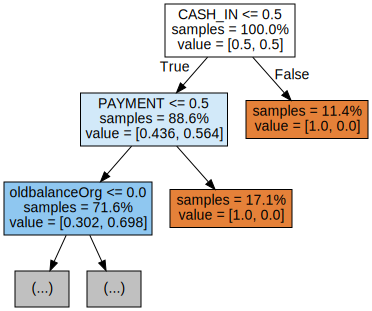

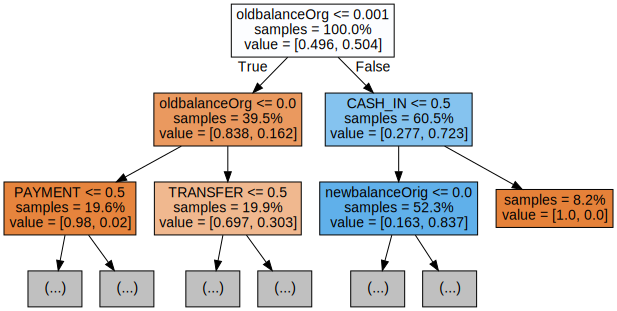

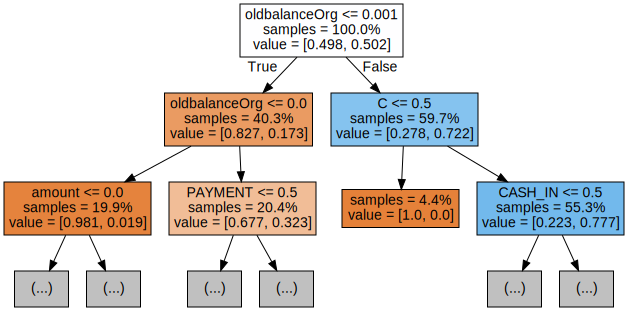

In [44]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

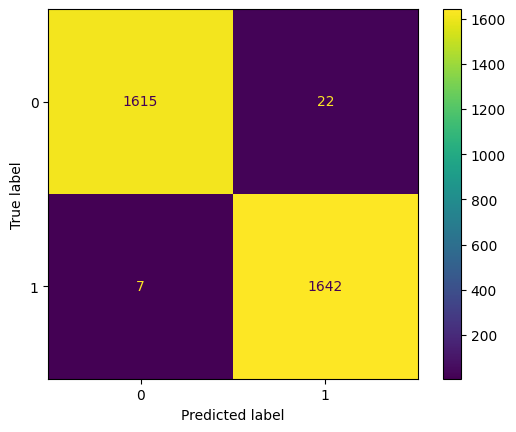

In [45]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a KNN classifier object (you might need to adjust n_neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to your training data (replace X_train and y_train with your actual training data)
knn.fit(X_train, y_train)

# Now you can predict using the fitted model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9403530127814973
Precision: 0.9437996334758705
Recall: 0.936931473620376


**LIGHTGBM**

In [47]:
!pip install lightgbm

In [48]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,
          eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss',
          callbacks=[lgb.log_evaluation(period=20)])

[LightGBM] [Info] Number of positive: 6564, number of negative: 6576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499543 -> initscore=-0.001826
[LightGBM] [Info] Start training from score -0.001826
[20]	training's binary_logloss: 0.103858	valid_0's binary_logloss: 0.108663
[40]	training's binary_logloss: 0.0266986	valid_0's binary_logloss: 0.0364398
[60]	training's binary_logloss: 0.00992599	valid_0's binary_logloss: 0.0265761
[80]	training's binary_logloss: 0.00501978	valid_0's binary_logloss: 0.0254014
[100]	training's binary_logloss: 0.00276896	valid_0's binary_logloss: 0.0258248


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [49]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9999
Testing accuracy 0.9936


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

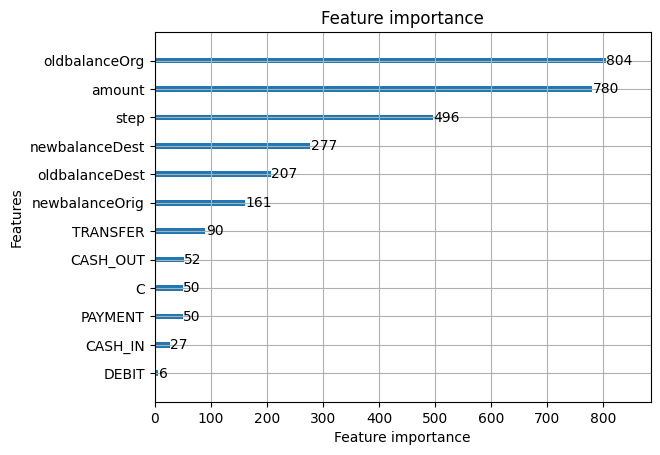

In [50]:
lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

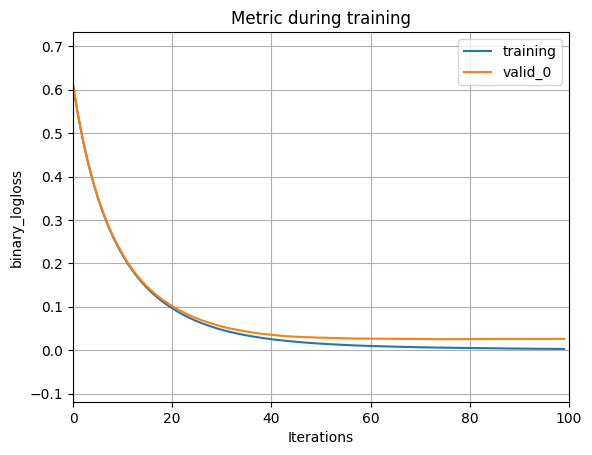

In [51]:
lgb.plot_metric(model)

<Axes: >

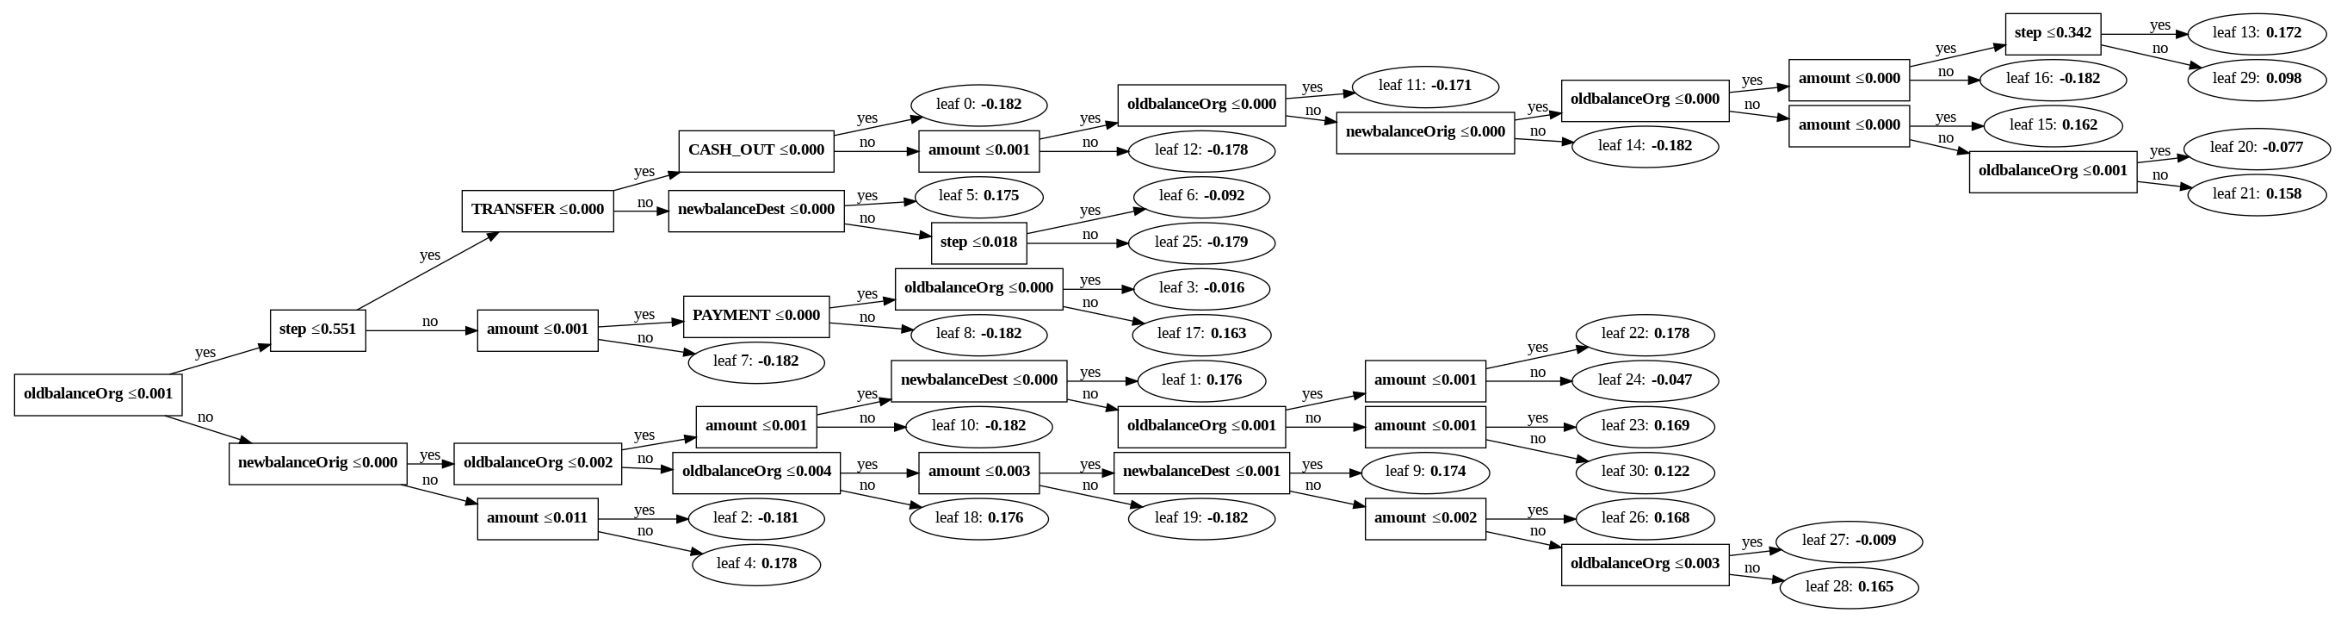

In [52]:
lgb.plot_tree(model,figsize=(30,40))

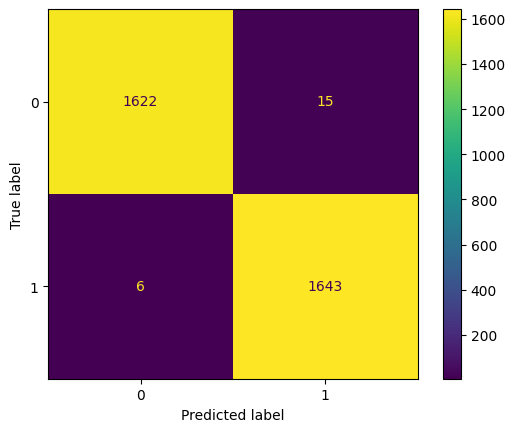

In [53]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

From all the analysis of all the models we have reached the conclusion that in this training-testing process **LIGHTGBM** is  working most efficiently.

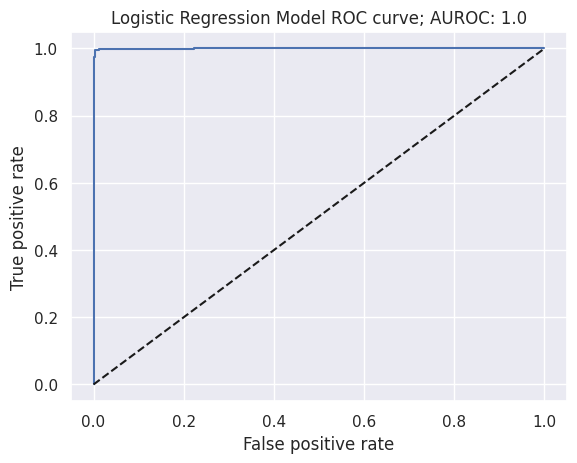

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
y_pred_proba = model.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

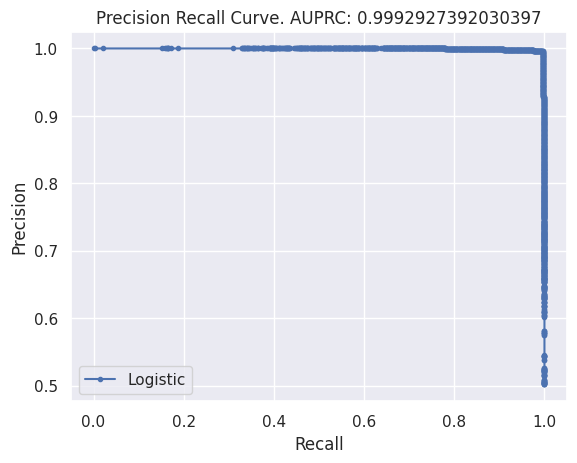

In [63]:
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

y_test_proba = model.predict_proba(X_test)[:, 1]

average_precision = average_precision_score(y_test, y_test_proba)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

plt.plot(recall, precision, marker='.', label='Logistic')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

The faster the true positive rate approaches one, the better the behaviour of our ROC curve and as we can see that our ROC curve is approaching 1 very soon hence the curve have better behaviour


And in Precision recall curve we can see that there is not so rapid decline in curve between recall values 0 and 1.
Hence our model is good.

Now explaining our model with **SHAP** values



In [55]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


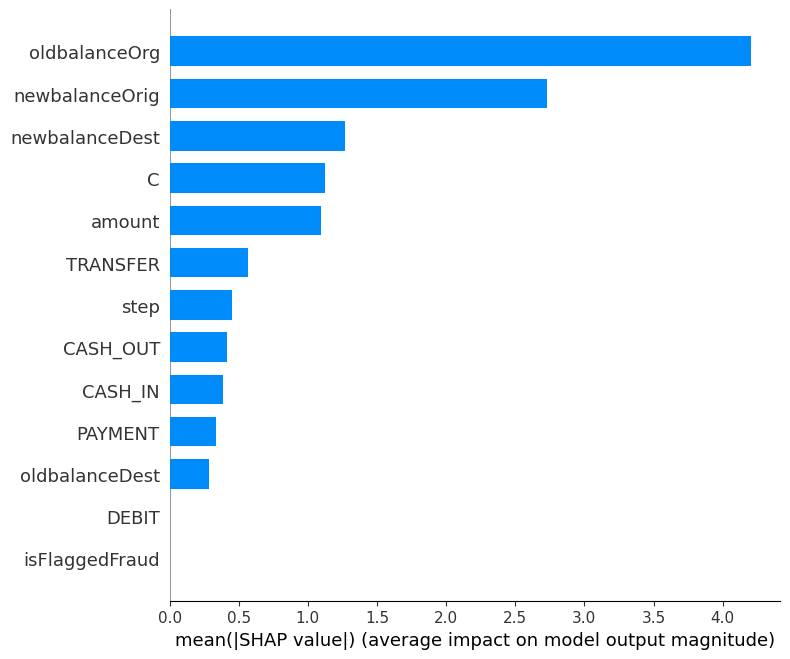

In [56]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

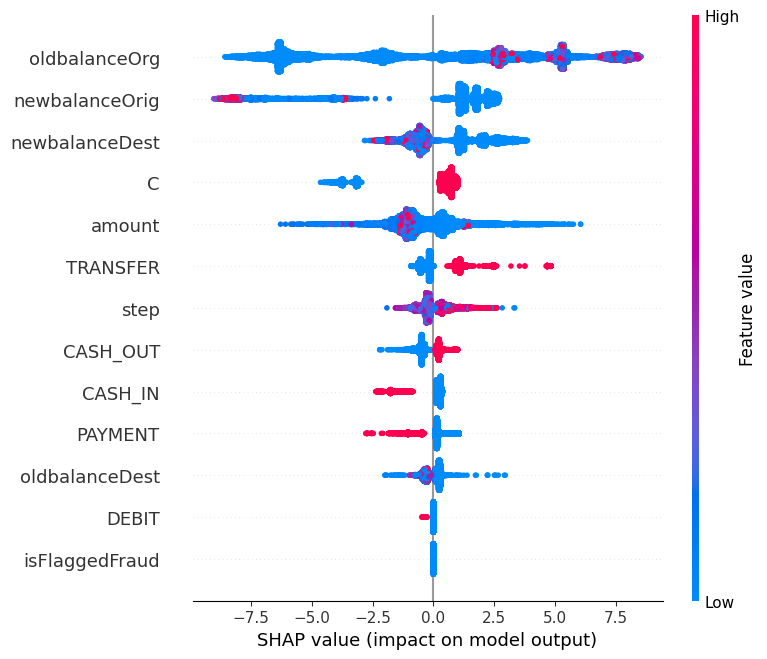

In [58]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values,X_train)



From the SHAP values we can identify **that old and new balace of origin** create a significant impact on our ML model and **account type Debit and is_flagged_fraud is making least impact**